> by Cengizhan Aydin (cay7466) and Viktoriia Simakova (vsi3776)

# Computer Vision - Special Topics

This notebook contains exercises for the Computer Vision Special Topics material.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, GlobalAveragePooling2D, Softmax, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

### Exercise 1 - Transfer Learning

**Summary:**
In this exercise we will use transfer learning using a neural networks outputs as features for a SVM.

**Data**:
We will use a subset of the cifar100 dataset (I call it cifar20). You are provided with a pre-trained model on the cifar80 (the other categories in cifar100) that reaches a test
accuracy of approximately 63% on the cifar80 dataset. Execute the cells below to prepare the dataset and load the pretrained model (```pretrained_model```). Notice that the pretrained model was trained
for a 80-class problem.  

**Your Tasks in this exercise:**

1. Use transfer learning to train a SVM classifier using the features extracted by the pretrained model
    * Extract features using a suitable layer in the pretrained model. Notice you might want to use the ```tf.keras.Model(inputs=, outputs=)``` class to access the outputs of each layer easily.
    * Train a SVM classifier (use sklearn) on the features extracted using the training data (```X_train_cifar20```)
    * Evaluate the performance of your classifier on the features extracted using the test data (```X_test_cifar20```)
    * Discuss your results.



In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

cifar20_labels = np.array([60, 72, 65, 97, 18, 47, 58, 51, 84,  2, 90,  6, 38, 35, 70, 89, 24, 86, 36, 32])
cifar20_label_mapping = {60 : 0, 72: 1, 65 : 2, 97 : 3, 18 : 4, 47 : 5, 58 : 6, 51 : 7, 84 : 8,  2 : 9, 90 : 10,
                          6 : 11, 38 : 12, 35 :13, 70 : 14, 89 : 15, 24 : 16, 86 : 17, 36: 18, 32 : 19}

X_train_cifar20 = X_train[np.isin(Y_train, cifar20_labels).ravel(),:,:]
Y_train_cifar20 = Y_train[np.isin(Y_train, cifar20_labels).ravel()]

X_test_cifar20 = X_test[np.isin(Y_test, cifar20_labels).ravel(),:,:]
Y_test_cifar20 = Y_test[np.isin(Y_test, cifar20_labels).ravel()]


Y_train_cifar20_remapped = []
for y in Y_train_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_train_cifar20_remapped.append(y_mapped)
Y_train_cifar20 = np.array(Y_train_cifar20_remapped)

Y_test_cifar20_remapped = []
for y in Y_test_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_test_cifar20_remapped.append(y_mapped)
Y_test_cifar20 = np.array(Y_test_cifar20_remapped)


In [3]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/cifar80_resnet_best.h5 -o cifar80_resnet_best.h5


Saved under cifar80_resnet_best.h5


In [3]:
pretrained = tf.keras.models.load_model('./cifar80_resnet_best.h5')

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:32: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### Exercise 2 - Fine Tuning

**Summary:**
In this exercise we will use fine tuning to adapt a neural network to a new dataset.

**Data**:
We will use a subset of the cifar100 dataset (I call it cifar20). You are provided with a pre-trained model on the cifar80 (the other categories in cifar100) that reaches a test
accuracy of approximately 63% on the cifar80 dataset. Execute the cells below to prepare the dataset and load the pretrained model (```pretrained_model```). Notice that the pretrained model was trained
for a 80-class problem.  

**Your Tasks in this exercise:**

1. Fine tune the pre-trained model.
    * Create a new model using the functional keras API that uses the pretrained model in a 20-class classification problem. Notice you will need to ignore/remove the final layer and replace it with a suitable layer.
    * Train your fine-tuning model:
        * Freeze all layers borrowed from the pre-trained model and and fine tune the model
        * Fine-tune all layers of the new model
        * Compare both models.
    * Plot and discuss your results.



In [ ]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/cifar80_resnet_best.h5 -o cifar80_resnet_best.h5

In [4]:
pretrained_model = tf.keras.models.load_model('./cifar80_resnet_best.h5')

import tensorflow as tf
import numpy as np

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

cifar20_labels = np.array([60, 72, 65, 97, 18, 47, 58, 51, 84,  2, 90,  6, 38, 35, 70, 89, 24, 86, 36, 32])
cifar20_label_mapping = {60 : 0, 72: 1, 65 : 2, 97 : 3, 18 : 4, 47 : 5, 58 : 6, 51 : 7, 84 : 8,  2 : 9, 90 : 10,
                          6 : 11, 38 : 12, 35 :13, 70 : 14, 89 : 15, 24 : 16, 86 : 17, 36: 18, 32 : 19}

X_train_cifar20 = X_train[np.isin(Y_train, cifar20_labels).ravel(),:,:]
Y_train_cifar20 = Y_train[np.isin(Y_train, cifar20_labels).ravel()]

X_test_cifar20 = X_test[np.isin(Y_test, cifar20_labels).ravel(),:,:]
Y_test_cifar20 = Y_test[np.isin(Y_test, cifar20_labels).ravel()]

Y_train_cifar20_remapped = []
for y in Y_train_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_train_cifar20_remapped.append(y_mapped)
Y_train_cifar20 = np.array(Y_train_cifar20_remapped)

Y_test_cifar20_remapped = []
for y in Y_test_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_test_cifar20_remapped.append(y_mapped)
Y_test_cifar20 = np.array(Y_test_cifar20_remapped)

Y_train_cifar_20_one_hot = tf.keras.utils.to_categorical(Y_train_cifar20_remapped)
Y_test_cifar_20_one_hot = tf.keras.utils.to_categorical(Y_test_cifar20_remapped)


### Exercise 3 - Regularization Techniques

**Summary:**
In this exercise we study different regularization techniques used to train neural networks.

**Data**:
In this exercise we will use the cifar10 dataset. I have provided you with a cell to load and preprocess the dataset below. I also provided you with a very simple base-CNN
(```cnn_base```).

**Your Tasks in this exercise:**

1. Train and evaluate the base-CNN
    * Train the base-CNN on the training portion of the dataset
    * Make sure that the test part of the data is used after each epoch to predict the test accuracy
    * Record the history of your training (```hist = cnn_base.fit(...)```) and plot your results after training is finished. You can access the training accuracy values
    via ```hist.history['acc']``` and the test accuracy values via ```hist.history['val_acc']```.
    * Explain the results.

2. Train and evaluate the base-CNN using L1-Regularization
    * Create a new cell and copy the base-CNN. Add a kernel regularizer and bias regularizer using L1-Regularization (where does it make sense?)
    * Train the L1-CNN, plot the results and compare the results to the base-CNN.
    * Explain the results.

3. Train and evaluate the base-CNN using L2-Regularization
    * Create a new cell and copy the base-CNN. Add a kernel regularizer and bias regularizer using L2-Regularization (where does it make sense?)
    * Train the L2-CNN, plot the results and compare the results to the base-CNN.
    * Explain the results.

4. Train and evaluate the base-CNN using Dropout
    * Create a new cell and copy the base-CNN. Add Dropout layers (where does it make sense?)
    * Train the Dropout-CNN, plot the results and compare the results to the base-CNN.
    * Explain the results.

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train = tf.keras.utils.to_categorical(y_train, 10)

In [6]:
# Use this simple CNN as your basis for adding regularization.
#
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, GlobalAveragePooling2D, Softmax, Dense, Flatten, Dropout

cnn_base = tf.keras.Sequential()
cnn_base.add(InputLayer(input_shape=(32,32,3)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Flatten())
cnn_base.add(Dense(256, activation='relu'))
cnn_base.add(Dense(10, activation='softmax'))

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [26]:
cnn_base.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
) 

history = cnn_base.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.4083 - loss: 1.6177 - val_accuracy: 0.6079 - val_loss: 1.1130
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6294 - loss: 1.0486 - val_accuracy: 0.6584 - val_loss: 0.9612
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7133 - loss: 0.8177 - val_accuracy: 0.6751 - val_loss: 0.9407
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7711 - loss: 0.6553 - val_accuracy: 0.6436 - val_loss: 1.0921
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.8194 - loss: 0.5053 - val_accuracy: 0.6692 - val_loss: 1.0730
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8693 - loss: 0.3744 - val_accuracy: 0.6668 - val_loss: 1.1678
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.9043 - loss: 0.2761 - val_accuracy: 0.6667 - val_loss: 1.3688
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.9277 -

In [27]:
_, acc = cnn_base.evaluate(x_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6502 - loss: 3.4201
Accuracy: 64.86%


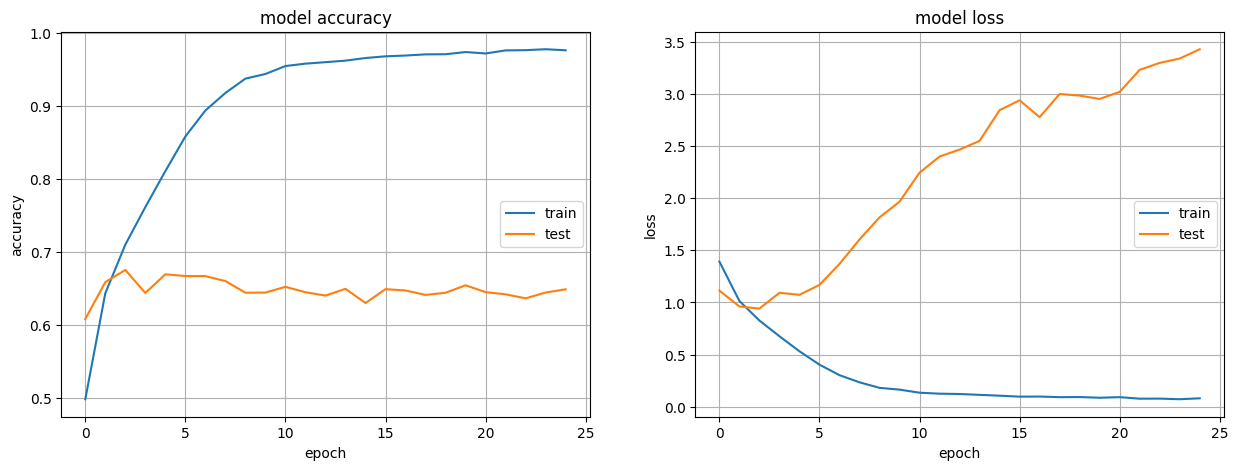

In [30]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='center right')
axs[0].grid()

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='center right')
axs[1].grid()

plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, Dense, Flatten

# Use this simple CNN as your basis for adding regularization.
#
cnn_l1 = tf.keras.Sequential()
cnn_l1.add(InputLayer(input_shape=(32,32,3)))
cnn_l1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l1.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l1.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l1.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l1.add(Flatten())
cnn_l1.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), bias_regularizer=tf.keras.regularizers.l1(0.01)))
cnn_l1.add(Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.01), bias_regularizer=tf.keras.regularizers.l1(0.01)))

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
cnn_l1.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

history_l1 = cnn_l1.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.2003 - loss: 20.6430 - val_accuracy: 0.2567 - val_loss: 6.9698
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.2453 - loss: 6.9134 - val_accuracy: 0.2702 - val_loss: 6.8836
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.2487 - loss: 6.8526 - val_accuracy: 0.2583 - val_loss: 6.8166
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.2723 - loss: 6.8107 - val_accuracy: 0.2888 - val_loss: 6.8290
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.2945 - loss: 6.7887 - val_accuracy: 0.3184 - val_loss: 6.7701
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.3035 - loss: 6.7763 - val_accuracy: 0.3293 - val_loss: 6.7678
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3115 - loss: 6.7743 - val_accuracy: 0.3251 - val_loss: 6.6871
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3141 

In [10]:
_, acc = cnn_l1.evaluate(x_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3876 - loss: 6.5645
Accuracy: 38.45%


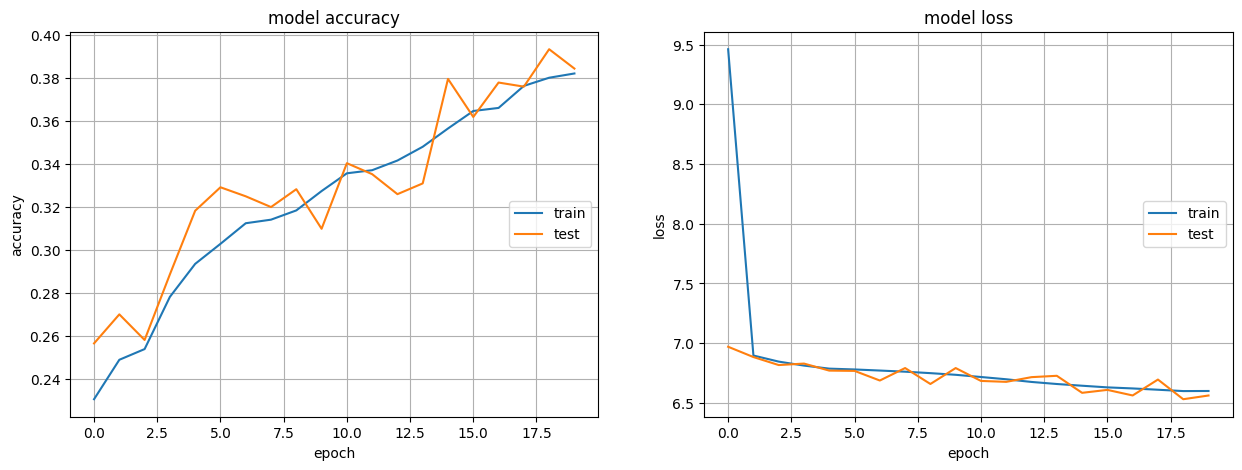

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].plot(history_l1.history['accuracy'])
axs[0].plot(history_l1.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='center right')
axs[0].grid()

axs[1].plot(history_l1.history['loss'])
axs[1].plot(history_l1.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='center right')
axs[1].grid()

plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential

cnn_l2 = Sequential()
cnn_l2.add(InputLayer(input_shape=(32,32,3)))
cnn_l2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l2.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l2.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l2.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l2.add(Flatten())
cnn_l2.add(Dense(256,kernel_regularizer=regularizers.L2(0.01) ,activation='relu'))
cnn_l2.add(Dense(10, activation='softmax'))

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [15]:
cnn_l2.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

history_l2 = cnn_l2.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3594 - loss: 2.1028 - val_accuracy: 0.4709 - val_loss: 1.6626
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.4934 - loss: 1.6180 - val_accuracy: 0.5428 - val_loss: 1.4912
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5388 - loss: 1.4830 - val_accuracy: 0.5712 - val_loss: 1.4013
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.5750 - loss: 1.3914 - val_accuracy: 0.5700 - val_loss: 1.4034
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.5938 - loss: 1.3226 - val_accuracy: 0.6128 - val_loss: 1.2498
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6040 - loss: 1.2827 - val_accuracy: 0.6043 - val_loss: 1.2624
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.6158 - loss: 1.2434 - val_accuracy: 0.6294 - val_loss: 1.2077
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6270 -

In [17]:
_, acc = cnn_l2.evaluate(x_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6549 - loss: 1.1031
Accuracy: 65.58%


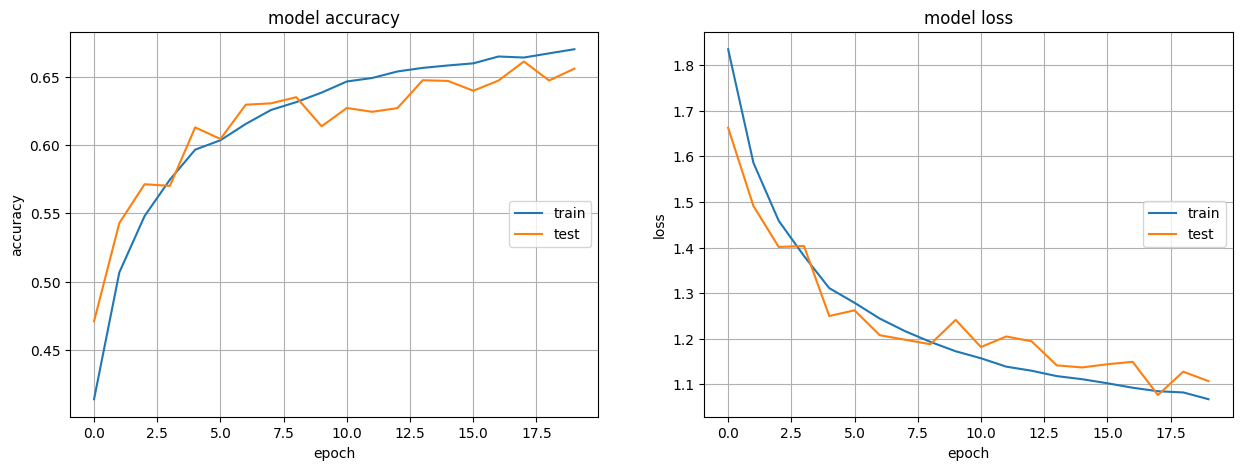

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].plot(history_l2.history['accuracy'])
axs[0].plot(history_l2.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='center right')
axs[0].grid()

axs[1].plot(history_l2.history['loss'])
axs[1].plot(history_l2.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='center right')
axs[1].grid()

plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential

cnn_dropout = Sequential()
cnn_dropout.add(InputLayer(input_shape=(32,32,3)))

cnn_dropout.add(Dropout(0.1))

cnn_dropout.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_dropout.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

cnn_dropout.add(Dropout(0.1))

cnn_dropout.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_dropout.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

cnn_dropout.add(Dropout(0.1))

cnn_dropout.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_dropout.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_dropout.add(Flatten())

cnn_dropout.add(Dropout(0.1))

cnn_dropout.add(Dense(256, activation='relu'))
cnn_dropout.add(Dense(10, activation='softmax'))

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
cnn_dropout.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

history_dropout = cnn_dropout.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.3370 - loss: 1.8361 - val_accuracy: 0.4794 - val_loss: 1.4379
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5632 - loss: 1.2220 - val_accuracy: 0.5931 - val_loss: 1.1485
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.6327 - loss: 1.0439 - val_accuracy: 0.6006 - val_loss: 1.1485
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6704 - loss: 0.9292 - val_accuracy: 0.5925 - val_loss: 1.1612
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7052 - loss: 0.8345 - val_accuracy: 0.6148 - val_loss: 1.1157
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7304 - loss: 0.7627 - val_accuracy: 0.6304 - val_loss: 1.0839
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7547 - loss: 0.6999 - val_accuracy: 0.6188 - val_loss: 1.1194
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7697 -

In [23]:
_, acc = cnn_dropout.evaluate(x_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6133 - loss: 1.7290
Accuracy: 61.03%


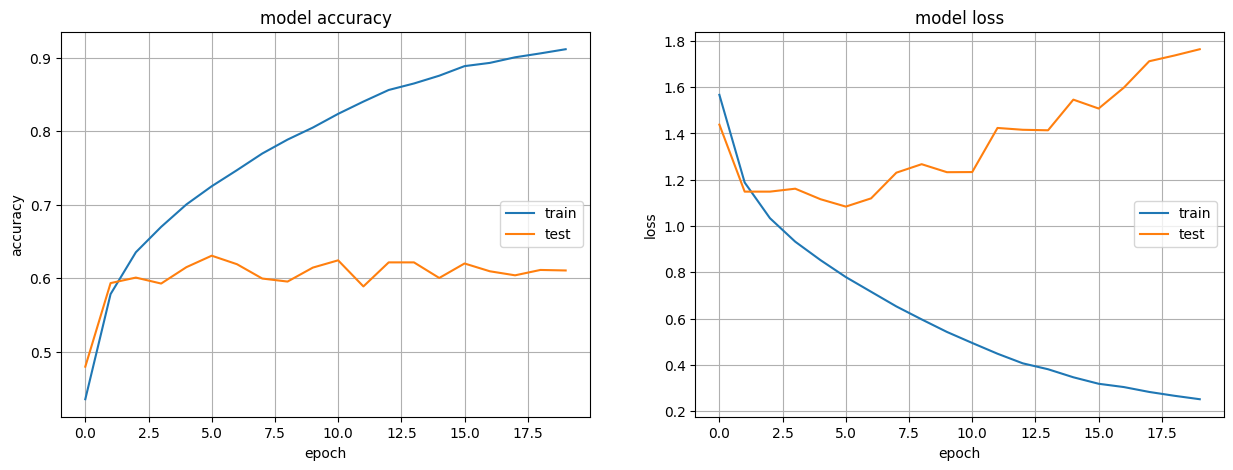

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].plot(history_dropout.history['accuracy'])
axs[0].plot(history_dropout.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='center right')
axs[0].grid()

axs[1].plot(history_dropout.history['loss'])
axs[1].plot(history_dropout.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='center right')
axs[1].grid()

plt.show()

<img src="https://i.redd.it/t2qscww2ks261.png" width=400 />

### Exercise 4 - Residual Learning

**Summary:**
In this exercise we will create two neural networks that take an image with shape $(32,32,3)$ as input and provide us with the same image as output $(32,32,3)$. Consequently we try to learn a mapping $\mathcal{H}(x) := x$, which is known as the identity function. The identity function is a trivial function in mathematics but can be hard to learn using convolution operations.

**Data**:
In this exercise we will use the cifar100 dataset. I have provided you with a cell to load and preprocess the dataset below.

**Your Tasks in this exercise:**

1. ConvNet
    * Create a convolutional neural network (with 2 BatchNormalization and Conv2D layers, using only InputLayer, Conv2D and BatchNormalization as layers), which accepts images of shape $(32,32,3)$ and returns an image of shape $(32,32,3)$. Notice: You will have to use the functional keras API to do so (see slides).
    * Train your neural network (use only 2 epochs) with a suitable loss function.  
2. ResNet
    * Create a convolutional neural network using two identity blocks of a ResNet, which accepts images of shape $(32,32,3)$ and returns an image of shape $(32,32,3)$.
    * Train your neural network (using only 2 epochs) with a suitable loss function.
3. Analyze your Results
    * Use the ```evaluate()``` function of your keras model to predict the MSE of both trained nets.
    * Use some images from ```X_test``` and feed them into your models. Visualize the results.
    * Compare the results, explain the difference between the results, explain what happened.






In [2]:
import tensorflow as tf

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

inputs = Input(shape=(32, 32, 3))

# Convolutional layers
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# Output layer
outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create model
convnet = Model(inputs, outputs)

# Compile model
convnet.compile(optimizer=Adam(), loss=MeanSquaredError())

In [5]:
convnet.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - loss: 0.0034 - val_loss: 4.8252e-04
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - loss: 0.0012 - val_loss: 4.5961e-04


In [6]:
from tensorflow.keras.layers import Add, Activation

def identity_block(input_tensor, filters):
    x = Conv2D(filters, (3, 3), activation='relu', padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Conv2D(filters, (3, 3), activation='linear', padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

# Define input layer
inputs = Input(shape=(32, 32, 3))

# First convolutional layer
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)

# Identity blocks
x = identity_block(x, 64)
x = identity_block(x, 64)

# Output layer
outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create model
resnet = Model(inputs, outputs)

# Compile model
resnet.compile(optimizer=Adam(), loss=MeanSquaredError())

In [7]:
resnet.fit(X_train, X_train, epochs=2, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 113ms/step - loss: 0.0043 - val_loss: 0.0019
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - loss: 9.3751e-04 - val_loss: 5.6744e-04


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.5770e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 5.6572e-04
MSE ConvNet: 0.00045960964052937925
MSE ResNet: 0.000567435403354466
Visualizing ConvNet results:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


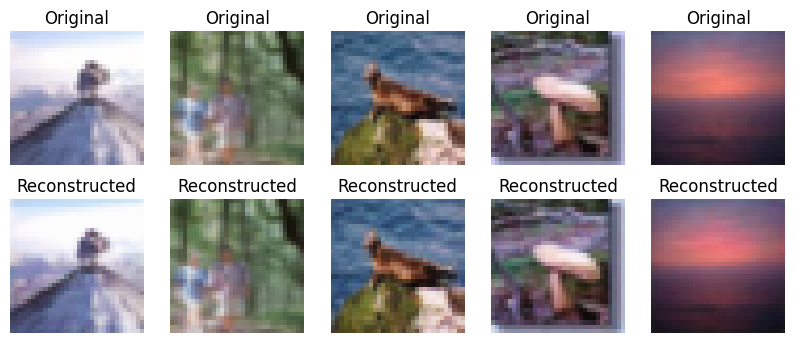

Visualizing ResNet results:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


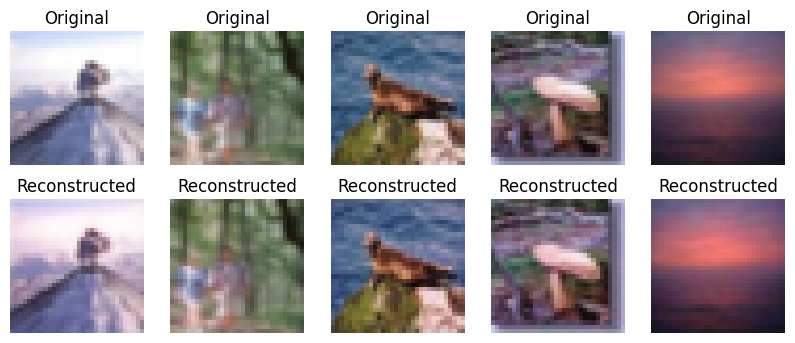

In [8]:
# Evaluate models
mse_convnet = convnet.evaluate(X_test, X_test)
mse_resnet = resnet.evaluate(X_test, X_test)

print("MSE ConvNet:", mse_convnet)
print("MSE ResNet:", mse_resnet)

# Visualize results
import matplotlib.pyplot as plt

def visualize_results(model):
    n = 5
    plt.figure(figsize=(10, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i])
        plt.title("Original")
        plt.axis("off")
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(model.predict(X_test[i:i+1])[0])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

print("Visualizing ConvNet results:")
visualize_results(convnet)

print("Visualizing ResNet results:")
visualize_results(resnet)


<img src="https://i.redd.it/uexzqaqeu9e41.jpg" width=400 />